# 차선인식

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

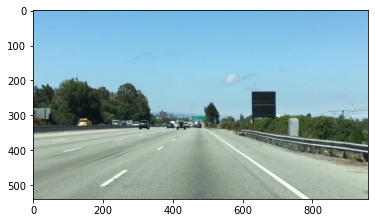

In [5]:
image = cv2.imread('./data/test.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

## Color Selection 

Color Picker Tool로 해당 이미지 색상의 RGB 코드값 얻어오기
https://annystudio.com/software/colorpicker/#download

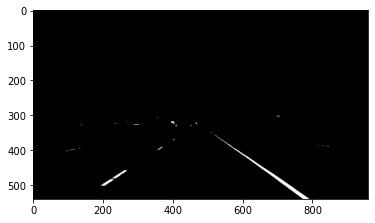

In [6]:
color_select = np.copy(image)

red_threshold = 230
green_threshold = 230
blue_threshold = 230

color_threshold = ((image[:, :, 0] < red_threshold) |
                  (image[:, :, 1] < green_threshold) |
                  (image[:, :, 2] < blue_threshold))

color_select[color_threshold] = [0, 0, 0]

plt.imshow(color_select)

## Region Selection

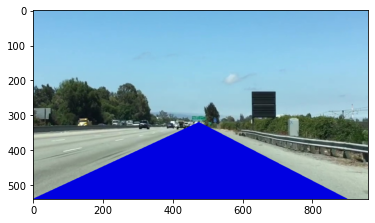

In [7]:
region_select = np.copy(image)

left_bottom = [0, 539]
right_bottom = [900, 539]
apex = [475, 320]

pts = np.array([left_bottom, right_bottom, apex])
cv2.fillPoly(region_select, [pts], color=[0, 0, 225])
plt.imshow(region_select)

## Color and Region Selection

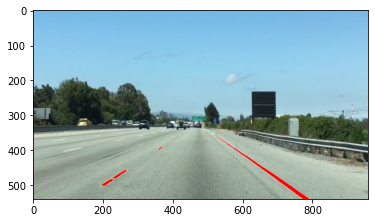

In [9]:
# 1. Color Selection
color_select = np.copy(image)

red_threshold = 230
green_threshold = 230
blue_threshold = 230

color_threshold = ((image[:, :, 0] < red_threshold) |
                  (image[:, :, 1] < green_threshold) |
                  (image[:, :, 2] < blue_threshold))

color_select[color_threshold] = [0, 0, 0]


# 2. Region Selection
region_select = np.copy(image)

# todo
left_bottom = [0, 539]
right_bottom = [900, 539]
apex = [475, 320]

pts = np.array([left_bottom, right_bottom, apex])
cv2.fillPoly(region_select, [pts], color=[0, 0, 255])

region_threshold = ((region_select[:, :, 0] == 0) &  # R channel
                   (region_select[:, :, 1] == 0) &  # G channel
                   (region_select[:, :, 2] == 255))  # B channel


# 3. Color Section + Region Selection
# color_thresholds : 차선(흰색)이 아닌 부분 True 설정
# region_threshold : 관심영역(region of interes, roi)에만 True 설정
lane_select = np.copy(image)
lane_select[~color_threshold & region_threshold] = [255, 0, 0]
    
plt.imshow(lane_select)    

## Canny Edge Detection

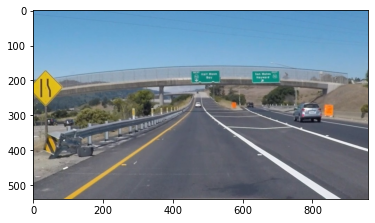

In [13]:
image = cv2.imread('./data/exit-ramp.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

### step1 grayscale 변환

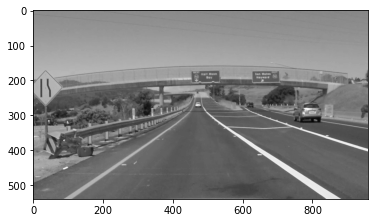

In [17]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')

### step2 gaussian blurring

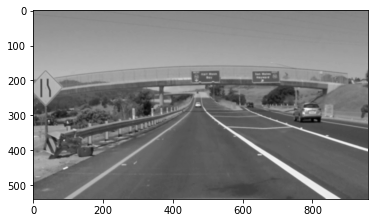

In [18]:
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)
plt.imshow(blur_gray, cmap='gray')

### step3 edge detect

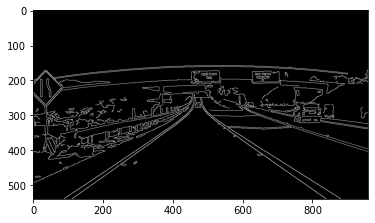

In [27]:
low_threshold = 50
high_threshold = 150
edge = cv2.Canny(blur_gray, low_threshold, high_threshold)
plt.imshow(edge, cmap='gray')

### step4 roi selection

In [29]:
cv2.EVENT_LBUTTONDOWN
cv2.EVENT_LBUTTONUP
cv2.EVENT_MOUSEMOVE
cv2.EVENT_FLAG_SHIFTKEY

arr_xy = []
def on_mouse(event, x, y, flags, param):
    global old_x, old_y
    if event == cv2.EVENT_LBUTTONDOWN:
        old_x, old_y = x, y
        print(old_x, old_y)
        arr_xy.append([old_x, old_y])
    elif event == cv2.EVENT_LBUTTONUP:
        pass
    
    elif event == cv2.EVENT_MOUSEMOVE:
        if flags & cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img, (old_x, old_y), (x, y), (0, 255, 255), 2)
            cv2.imshow('img', img)
            old_x, old_y = x, y
    
# 마우스 이벤트가 발생했을 때 처리할 루틴(함수) 등록

cv2.imshow('img', edge)
cv2.setMouseCallback('img', on_mouse)
cv2.waitKey()
cv2.destroyAllWindows()

arr_xy

453 278
486 279
840 538
122 537


[[453, 278], [486, 279], [840, 538], [122, 537]]

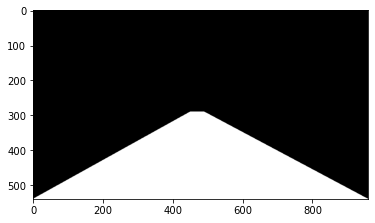

In [35]:
height = edge.shape[0]
width = edge.shape[1]

pts = np.array([[0, height -1], [450,290], [490, 290], [width-1, height-1]])

mask = np.zeros(edge.shape, edge.dtype)
cv2.fillPoly(mask, [pts], 255)
plt.imshow(mask, cmap='gray')

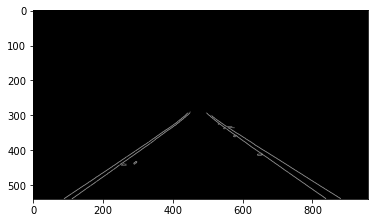

In [37]:
masked_edges = cv2.bitwise_and(edge, mask)
plt.imshow(masked_edges, cmap='gray')

### step5 line detect (hough transform)

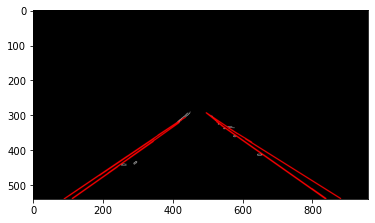

In [51]:
import math
rho = 1
theta = math.pi/180
threshold = 30
minLineLength = 40
maxLineGap = 15

lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold,
               minLineLength = minLineLength,
               maxLineGap = maxLineGap)

# dst = cv2.cvtColor(masked_edges, cv2.COLOR_GRAY2BGR) # 직선을 그릴 도화지 (3 채널 도화지)
dst = np.dstack((masked_edges, masked_edges, masked_edges))

if lines is not None:
    for i in range(len(lines)):
        line = lines[i][0]
        pt1 = line[0], line[1]
        pt2 = line[2], line[3]
        cv2.line(dst, pt1, pt2, (255, 0, 0), 2, cv2.LINE_AA)

plt.imshow(dst)

In [45]:
lines

array([[[651, 407, 839, 538]],

       [[548, 329, 819, 499]],

       [[ 89, 539, 412, 321]],

       [[111, 538, 348, 372]],

       [[634, 384, 880, 538]],

       [[535, 326, 838, 539]]], dtype=int32)

## ROI Selection

## Hough Transform

## Pipeline
- Canny Detection -> ROI Selection -> Hough Transform